# Titanic: Machine Learning from Disaster

In [1]:
# 데이터 분석
import pandas as pd
import numpy as np
import random as rnd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 기계 학습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

## 데이터 로딩 및 확인

In [71]:
# 데이터 로딩
train_df = pd.read_csv('./data/House_Prices/train.csv')
test_df = pd.read_csv('./data/House_Prices/test.csv')
combine = [train_df, test_df]

In [43]:
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotArea' 'LotAreaGroup' 'OverallQual'
 'OverallCond' 'Alley' 'YearRemodAdd' 'Foundation' 'BedroomAbvGr'
 'SaleCondition' 'SalePrice' 'Unnamed: 13' 'Unnamed: 14' 'Unnamed: 15'
 'Unnamed: 16']


In [66]:
# preview the data
train_df.head()

,Id,MSSubClass,MSZoning,Street,LotArea,LotAreaGroup,OverallQual,OverallCond,Alley,YearRemodAdd,Foundation,BedroomAbvGr,SaleCondition,SalePrice
0,1,60,RL,Pave,8450,5,7,5,NA,2003,PConc,3,Normal,208500
1,2,20,RL,Pave,9600,5,6,8,NA,1976,CBlock,3,Normal,181500
2,3,60,RL,Pave,11250,6,7,5,NA,2002,PConc,3,Normal,223500
3,4,70,RL,Pave,9550,5,7,5,NA,1970,BrkTil,3,Abnorml,140000
4,5,60,RL,Pave,14260,8,8,5,NA,2000,PConc,4,Normal,250000


In [7]:
# preview tail of the data
##### 여기 채워 넣기 #####

In [8]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   OverallQual    1460 non-null   int64 
 5   OverallCond    1460 non-null   int64 
 6   Alley          91 non-null     object
 7   YearRemodAdd   1460 non-null   int64 
 8   Foundation     1460 non-null   object
 9   BedroomAbvGr   1460 non-null   int64 
 10  SaleCondition  1460 non-null   object
 11  SalePrice      1460 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.0+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0 

In [9]:
train_df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1984.865753,2.866438,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,20.645407,0.815778,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1967.000000,2.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1994.000000,3.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2004.000000,3.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,8.000000,755000.000000


## Missing Value 처리

In [10]:
# Missing Value 는 불필요

###### 누락된 값들에 그냥 중간값을 일괄적으로 채워넣는 것이 좋아보인다. 남은 것은 train에서 Embarked, test에서 Fare

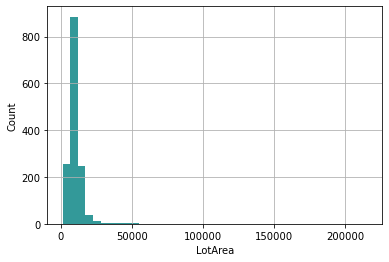

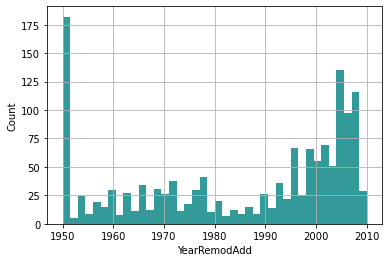

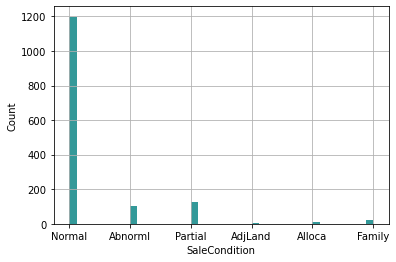

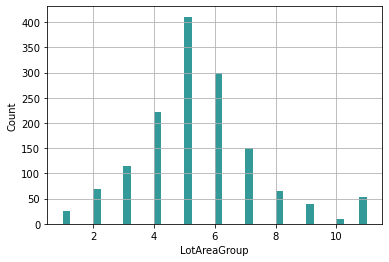

In [46]:
# LotArea 분포 확인 결과, 20000 이하 로 데이터가 몰려있어, 초과 데이터 제거가 좋을 것 같다고 판단
# 데이터 전처리 시에, 해당 데이터 제외 처리.
ax = train_df["LotArea"].hist(bins=40, color='teal', alpha=0.8)
ax.set(xlabel='LotArea', ylabel='Count')
plt.show()

ax = train_df["YearRemodAdd"].hist(bins=40, color='teal', alpha=0.8)
ax.set(xlabel='YearRemodAdd', ylabel='Count')
plt.show()


ax = train_df["SaleCondition"].hist(bins=40, color='teal', alpha=0.8)
ax.set(xlabel='SaleCondition', ylabel='Count')
plt.show()

ax = train_df["LotAreaGroup"].hist(bins=40, color='teal', alpha=0.8)
ax.set(xlabel='LotAreaGroup', ylabel='Count')
plt.show()

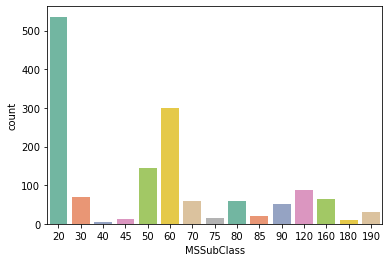

In [16]:
# train set에서 Embarked 의 분포를 확인해보자.
sns.countplot(x='MSSubClass',data=train_df,palette='Set2')
plt.show()

## 데이터 속성별 값에 따라 판매가격 확인


In [19]:
# MSSubClass에 따른 평균 SalePrice 확인
train_df[['MSSubClass', 'SalePrice']].groupby(['MSSubClass'], as_index=False).mean().sort_values(by='MSSubClass', ascending=False)

,MSSubClass,SalePrice
14,190,129613.333333
13,180,102300.000000
12,160,138647.380952
11,120,200779.080460
10,90,133541.076923
9,85,147810.000000
8,80,169736.551724
7,75,192437.500000
6,70,166772.416667
5,60,239948.501672


In [20]:
# OverallQual에 따른 평균 SalePrice 확인
train_df[['OverallQual', 'SalePrice']].groupby(['OverallQual'], as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [21]:
# OverallCond에 따른 평균 SalePrice 확인
train_df[['OverallCond', 'SalePrice']].groupby(['OverallCond'], as_index=False).mean().sort_values(by='OverallCond', ascending=False)

,OverallCond,SalePrice
8,9,216004.545455
7,8,155651.736111
6,7,158145.487805
5,6,153961.591270
4,5,203146.914738
3,4,120438.438596
2,3,101929.400000
1,2,141986.400000
0,1,61000.000000


In [41]:
# MSZoning 따른 평균 SalePrice 확인
train_df[['MSZoning', 'SalePrice']].groupby(['MSZoning'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,MSZoning,SalePrice
1,FV,214014.061538
3,RL,191004.994787
2,RH,131558.375000
4,RM,126316.830275
0,C (all),74528.000000


In [33]:
# BedroomAbvGr 따른 평균 SalePrice 확인
# 데이터가 유의미하지 않은 것으로 판단 되어 제외.
train_df[['BedroomAbvGr', 'SalePrice']].groupby(['BedroomAbvGr'], as_index=False).mean().sort_values(by='BedroomAbvGr', ascending=False)

,BedroomAbvGr,SalePrice
7,8,200000.000000
6,6,143779.000000
5,5,180819.047619
4,4,220421.253521
3,3,181056.870647
2,2,158197.659218
1,1,173162.420000
0,0,221493.166667


In [40]:
# Alley(골목길 유형) 은 NA 값이 많아 유의미하지 않아 제외 처리.
train_df[['Alley', 'SalePrice']].groupby(['Alley'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,Alley,SalePrice
1,NA,183452.131483
2,Pave,168000.585366
0,Grvl,122219.080000


In [39]:
# Foundation 따른 평균 SalePrice 확인
train_df[['Foundation', 'SalePrice']].groupby(['Foundation'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,Foundation,SalePrice
2,PConc,225230.442040
5,Wood,185666.666667
4,Stone,165959.166667
1,CBlock,149805.714511
0,BrkTil,132291.075342
3,Slab,107365.625000


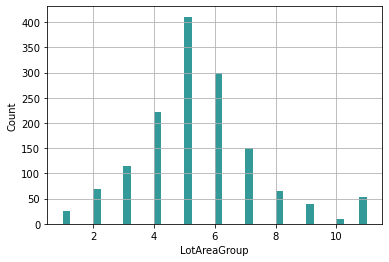

,LotAreaGroup,SalePrice
10,11,253926.283019
9,10,209647.000000
8,9,225014.307692
7,8,269159.923077
6,7,228822.430464
5,6,193094.456667
4,5,166201.399027
3,4,144563.018100
2,3,139372.504348
1,2,158106.657143


In [47]:
# LotArea 따른 평균 SalePrice 확인
# 데이터 분포를 보기 위하여 2000 단위로 그룹핑하여 데이터 확인
ax = train_df["LotAreaGroup"].hist(bins=40, color='teal', alpha=0.8)
ax.set(xlabel='LotAreaGroup', ylabel='Count')
plt.show()

train_df[['LotAreaGroup', 'SalePrice']].groupby(['LotAreaGroup'], as_index=False).mean().sort_values(by='LotAreaGroup', ascending=False)

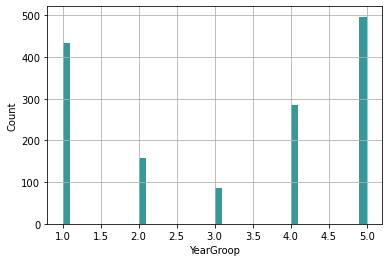

,YearGroop,SalePrice
4,5,222179.625755
3,4,202562.077193
2,3,183180.581395
1,2,149442.773585
0,1,130430.829099


In [52]:
# YearGroop 따른 평균 SalePrice 확인
# 데이터 분포를 보기 위하여 10년 단위로 그룹핑하여 데이터 확인
ax = train_df["YearGroop"].hist(bins=40, color='teal', alpha=0.8)
ax.set(xlabel='YearGroop', ylabel='Count')
plt.show()

train_df[['YearGroop', 'SalePrice']].groupby(['YearGroop'], as_index=False).mean().sort_values(by='YearGroop', ascending=False)

In [132]:
# SaleCondition에 따른 SalePrice 확률
train_df[['SaleCondition', 'SalePrice']].groupby(['SaleCondition'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,SaleCondition,SalePrice
0,Normal,172202.960173


In [133]:
# 부모자식 관계에 있는 사람의 명수에 따른 생존자 확률
train_df[["YearRemodAdd", "SalePrice"]].groupby(['YearRemodAdd'], as_index=False).mean().sort_values(by='YearRemodAdd', ascending=False)

,YearRemodAdd,SalePrice
60,2010,127000.000000
59,2009,238950.000000
58,2008,244622.409091
57,2007,201899.029412
56,2006,203006.829787
...,...,...
4,1954,123181.818182
3,1953,143675.000000
2,1952,124000.000000
1,1951,126966.666667


## 데이터 전처리: 속성 조정

###### 속성 조정
1. PassengerId는 샘플별로 다르기 때문에 제거
2. Survived 는 예측해야할 output
3. Age, Fare는 그대로 채택
4. Sex, Pclass, Embarked는 카테고리 값이므로 처리.
5. SibSp, Parch 는 Binary 값으로 수정
6. Ticket은 표 번호이므로 상관성이 거의 없는 값이라 제거
7. Name은 한 번 살펴볼 것.

### 데이터 전처리

In [134]:
#train_df.drop(train_df[train_df['SaleCondition'] != 'Normal'].index, inplace=True)
train_df.drop(train_df[train_df['LotArea'] >= 20000].index, inplace=True)

train_df2 = pd.get_dummies(train_df, columns=["MSSubClass"])
train_df3 = pd.get_dummies(train_df2, columns=["MSZoning"])
train_df4 = pd.get_dummies(train_df3, columns=["OverallQual"])
train_df5 = pd.get_dummies(train_df4, columns=["OverallCond"])
train_df6 = pd.get_dummies(train_df5, columns=["YearRemodAdd"])
train_df7 = pd.get_dummies(train_df6, columns=["Foundation"])

### 데이터 전처리 : 속성 조정 - 쓸모없는 속성 제거

In [135]:

train_df7.drop('Street', axis=1, inplace=True)
train_df7.drop('LotAreaGroup', axis=1, inplace=True)
train_df7.drop('Alley', axis=1, inplace=True)
train_df7.drop('BedroomAbvGr', axis=1, inplace=True)
train_df7.drop('SaleCondition', axis=1, inplace=True)
train_df7.drop('Id', axis=1, inplace=True)
# test_df 와 칼럼을 맞춰주기 위하여, MSSubClass_150 필드 추가.
train_df7['MSSubClass_150'] = 0
train_df7.head()

,LotArea,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,...,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MSSubClass_150
0,8450,208500,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,9600,181500,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,11250,223500,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,14260,250000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,14115,143000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 데이터 전처리 : 위의 속성 조정을 이젠 test_df에도 모두 해주자

In [136]:
test_df2 = pd.get_dummies(test_df, columns=["MSSubClass"])
test_df3 = pd.get_dummies(test_df2, columns=["MSZoning"])
test_df4 = pd.get_dummies(test_df3, columns=["OverallQual"])
test_df5 = pd.get_dummies(test_df4, columns=["OverallCond"])
test_df6 = pd.get_dummies(test_df5, columns=["YearRemodAdd"])
test_df7 = pd.get_dummies(test_df6, columns=["Foundation"])

test_df7.drop('Street', axis=1, inplace=True)
test_df7.drop('Alley', axis=1, inplace=True)
test_df7.drop('BedroomAbvGr', axis=1, inplace=True)
test_df7.drop('SaleCondition', axis=1, inplace=True)

test_df7.head()

,Id,LotArea,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,...,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1461,11622,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1462,14267,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1463,13830,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1464,9978,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1465,5005,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


###### 이제 드디어 데이터 준비는 모두 끝났다!!!!!!!!

# Machine Learning 기법을 활용한 생존자 예측
## 활용 모델

Logistic Regression

k-Nearest Neighbors

Support Vector Machines

Naive Bayes classifier

Decision Tree

Artificial neural network

In [137]:
# 우선 학습 집합과 테스트 집합을 준비한다.
X_train = train_df7.drop("SalePrice", axis=1)
Y_train = train_df7["SalePrice"]
X_test = test_df7.drop("Id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
X_test.head()

,LotArea,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,...,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,11622,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,14267,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,13830,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,9978,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Logistic Regression

In [138]:
# Logistic Regression training
logreg = LogisticRegression()
##### 여기 채워 넣기 #####
logreg.fit(X_train, Y_train)

c:\users\river\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
# Logistic Regression prediction
Y_pred_logreg = logreg.predict(X_test)
##### 여기 채워 넣기 ##### # training 데이터에 대해 예측 정확도 구함
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

8.74

In [140]:
# 속성별 상관 계수
coeff_df  =  pd.DataFrame(train_df4.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
21,MSSubClass_120,0.246245
33,OverallQual_4,0.243769
1,LotArea,0.199733
19,MSSubClass_85,0.136046
0,Street,0.000534
31,OverallQual_2,-0.000111
32,OverallQual_3,-0.000355
22,MSSubClass_160,-0.000356
16,MSSubClass_70,-0.000436
3,OverallCond,-0.000439


## Support Vector Machines

In [141]:
# SVM 모델 학습
svc = SVC()
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [142]:
# 테스트 데이터에 대해 예측
Y_pred_svc = svc.predict(X_test)
# 테스트 데이터를 현재 레이블이 없으므로 학습 데이터에 대해 예측한 정확도 측정
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

2.08

## k-Nearest Neighbor

In [143]:
knn  = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

34.72

## Naive Bayes classifiers

In [144]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_NB = gaussian.predict(X_test)
##### 여기 채워 넣기 #####
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

67.01

## Decision tree

In [145]:
# Decision Tree

##### 여기 채워 넣기 #####
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_DT = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

67.01

## Artificial Neural Network

In [146]:
##### 여기 채워 넣기 #####
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(20,10), random_state=1)
ANN.fit(X_train, Y_train)
Y_pred_ANN = ANN.predict(X_test)
acc_ANN = round(ANN.score(X_train, Y_train) * 100, 2)
acc_ANN

0.95

## 최종 결과 저장

In [147]:
Y_pred = Y_pred_DT

submission = pd.DataFrame({
	"PassengerId" : test_df7["Id"],
	"Survived" : Y_pred
})

submission.to_csv('./data/submission.csv', index=False)

submission


Y_pred_svc_train = svc.predict(X_train)

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_train, Y_pred_svc_train)
CM

PermissionError: [Errno 13] Permission denied: './data/submission.csv'